# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_assets = 1.2
eth_assets = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
btc_response = requests.get(btc_url)
eth_response = requests.get(eth_url)

In [6]:
btc_data = btc_response.json()
eth_data = eth_response.json()

In [7]:


# Fetch current BTC price
btc_current_price = btc_data['data']['1']['quotes']['USD']['price']
#btc_current_price
# Fetch current ETH price
eth_current_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
btc_current_value = btc_current_price * btc_assets
eth_current_value = eth_current_price * eth_assets

# Print current crypto wallet balance
print(f"The current value of your {btc_assets} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {eth_assets} ETH is ${eth_current_value:0.2f}")

The current value of your 1.2 BTC is $27592.80
The current value of your 5.3 ETH is $8452.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-24 05:00:00+00:00,99.84,100.32,99.68,100.28,6539095,20248,100.146289,AGG
2023-01-24 05:00:00+00:00,398.88,401.15,397.64,400.20,59549719,434698,399.936054,SPY


In [11]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)


In [12]:
# Concatenate the ticker DataFrames
new_portfolio_df = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
new_portfolio_df

AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-24 05:00:00+00:00  99.84  100.32  99.68  100.28  6539095       20248   

                                          SPY                         \
                                 vwap    open    high     low  close   
timestamp                                                              
2023-01-24 05:00:00+00:00  100.146289  398.88  401.15  397.64  400.2   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-24 05:00:00+00:00  59549719      434698  399.936054

In [13]:
# Pick AGG and SPY close prices
agg_close = new_portfolio_df["AGG"]["close"].values[0]
spy_close = new_portfolio_df["SPY"]["close"].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close :0.2f}")
print(f"Current SPY closing price: ${spy_close :0.2f}")

Current AGG closing price: $100.28
Current SPY closing price: $400.20


In [14]:
# Compute the current value of shares
current_spy_value = spy_close * my_spy
current_agg_value = agg_close * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${current_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${current_agg_value:0.2f}")

The current value of your 50 SPY shares is $20010.00
The current value of your 200 AGG shares is $20056.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000.00

# Consolidate financial assets data
total_crypto = btc_current_value + eth_current_value
total_stocks = current_spy_value + current_agg_value
savings_data = [35279.49, 40066.00]

# Create savings DataFrame
savings_df = pd.DataFrame([35279.49, 40066.00], columns = ["Amount"], index = ["Crypto", "Stock/Bond"])


# Display savings DataFrame
display(savings_df)

,Amount
Crypto,35279.49
Stock/Bond,40066.00


<AxesSubplot:title={'center':'Current Savings'}, ylabel='Amount'>

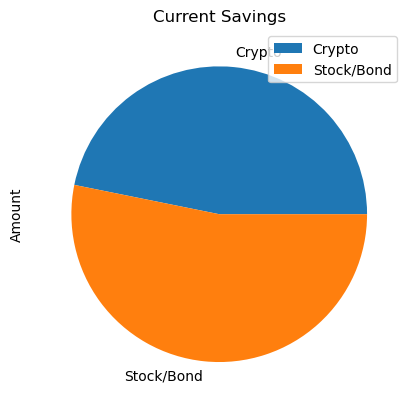

In [16]:
# Plot savings pie chart
savings_df.plot.pie(y="Amount", title= "Current Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_portfolio_value = total_crypto #+ total_stocks

# Validate saving health
if total_portfolio_value > emergency_fund:
    print(f"Congratulations! You have enough money to create this fund.")

elif total_portfolio_value == emergency_fund:
    print(f"Awesome job on reaching this important financial goal!")
else:
    print(f"You are currently ${emergency_fund - total_portfolio_value: 0.2f} away from your goal. You can do it!") 

Congratulations! You have enough money to create this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-24', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_five_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_five_year[df_five_year['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_five_year[df_five_year['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
ticker_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-01-24 05:00:00+00:00  108.25  108.32  108.15  108.29  2362470   
2018-01-25 05:00:00+00:00  108.26  108.57  108.19  108.57  9858098   
2018-01-26 05:00:00+00:00  108.51  108.51  108.27  108.37  3808163   
2018-01-29 05:00:00+00:00  108.14  108.25  108.02  108.18  3974898   
2018-01-30 05:00:00+00:00  108.12  108.12  107.92  108.01  3659538   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2018-01-24 05:00:00+00:00       10803  108.259722  284.02  284.7000  281.840   
2018-01-25 05:00:00+00:00       19793  108.434750  284.16  284.2700  282.405   
2018-01-26 05:00:00+00:00       13216  108.364405  284.25  286.6285  283.960   
2018-01-29 05:00:00+00:00       17162  108.140754  285.93  286.4300  284.500   
2018-01-30 05:00:00+00:00       14454  108.010293  282.59  284.7360  281.220   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-01-24 05:00:00+00:00  283.12  137943542      357700  283.344564  
2018-01-25 05:00:00+00:00  283.30   85942448      267779  283.349445  
2018-01-26 05:00:00+00:00  286.56  111502740      267028  285.508779  
2018-01-29 05:00:00+00:00  284.64   90206637      286719  285.443701  
2018-01-30 05:00:00+00:00  281.63  132075557      427207  282.425628

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_portfolio = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

MC_portfolio.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-01-24 05:00:00+00:00  108.25  108.32  108.15  108.29  2362470   
2018-01-25 05:00:00+00:00  108.26  108.57  108.19  108.57  9858098   
2018-01-26 05:00:00+00:00  108.51  108.51  108.27  108.37  3808163   
2018-01-29 05:00:00+00:00  108.14  108.25  108.02  108.18  3974898   
2018-01-30 05:00:00+00:00  108.12  108.12  107.92  108.01  3659538   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-24 05:00:00+00:00       10803  108.259722          NaN  284.02   
2018-01-25 05:00:00+00:00       19793  108.434750     0.002586  284.16   
2018-01-26 05:00:00+00:00       13216  108.364405    -0.001842  284.25   
2018-01-29 05:00:00+00:00       17162  108.140754    -0.001753  285.93   
2018-01-30 05:00:00+00:00       14454  108.010293    -0.001571  282.59   

                                                                             \
                               high      low   close     volume trade_count   
timestamp                                                                     
2018-01-24 05:00:00+00:00  284.7000  281.840  283.12  137943542      357700   
2018-01-25 05:00:00+00:00  284.2700  282.405  283.30   85942448      267779   
2018-01-26 05:00:00+00:00  286.6285  283.960  286.56  111502740      267028   
2018-01-29 05:00:00+00:00  286.4300  284.500  284.64   90206637      286719   
2018-01-30 05:00:00+00:00  284.7360  281.220  281.63  132075557      427207   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-24 05:00:00+00:00  283.344564          NaN  
2018-01-25 05:00:00+00:00  283.349445     0.000636  
2018-01-26 05:00:00+00:00  285.508779     0.011507  
2018-01-29 05:00:00+00:00  285.443701    -0.006700  
2018-01-30 05:00:00+00:00  282.425628    -0.010575

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\17633\Desktop\FinTech Bootcamp\Financial_Planner\Financial_Planning_for_Retirement\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013508,0.996803,0.997547,1.003177,0.993367,0.995998,1.007627,0.991501,0.998456,0.989928,...,1.014276,0.993202,1.005390,0.996062,1.004469,1.000882,0.992672,1.004651,0.994275,0.990104
2,1.009093,0.993662,0.993542,0.995599,1.004078,1.000747,1.005946,0.988923,1.004093,0.992609,...,1.012490,0.992277,0.998567,0.990996,1.010636,1.008391,0.985123,1.014343,0.994507,0.992407
3,1.018848,0.993462,0.992161,1.003308,1.021913,1.006349,1.004735,0.979004,1.000675,0.991334,...,1.021746,0.992423,1.006703,0.997243,1.004901,1.004063,0.974595,1.012221,0.995496,0.989311
4,1.018373,0.992784,0.993990,0.996554,1.021022,0.996166,1.004273,0.986906,0.998625,0.987574,...,1.012847,0.991006,1.007374,1.002629,0.999783,0.993124,0.992621,1.016103,1.007808,0.987283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.713954,2.417435,1.472745,1.707860,8.477915,1.444112,5.105978,2.766218,2.346591,2.471237,...,1.295529,1.753858,1.802273,1.321060,4.203685,2.107632,1.443445,1.186372,2.013855,1.836180
7557,3.694418,2.435040,1.477184,1.718371,8.457778,1.443374,5.103920,2.749125,2.346308,2.515096,...,1.295481,1.744067,1.810895,1.316148,4.213092,2.095758,1.463882,1.184632,2.028868,1.838377
7558,3.717899,2.404712,1.477072,1.733098,8.537507,1.439015,5.157823,2.763118,2.340806,2.504653,...,1.302334,1.746212,1.799615,1.307429,4.196450,2.092369,1.463762,1.183401,2.044663,1.838780
7559,3.712205,2.416231,1.482315,1.748803,8.473472,1.450442,5.164073,2.801555,2.333105,2.479076,...,1.311151,1.749398,1.804353,1.291677,4.230628,2.080348,1.471381,1.184856,2.044524,1.846606


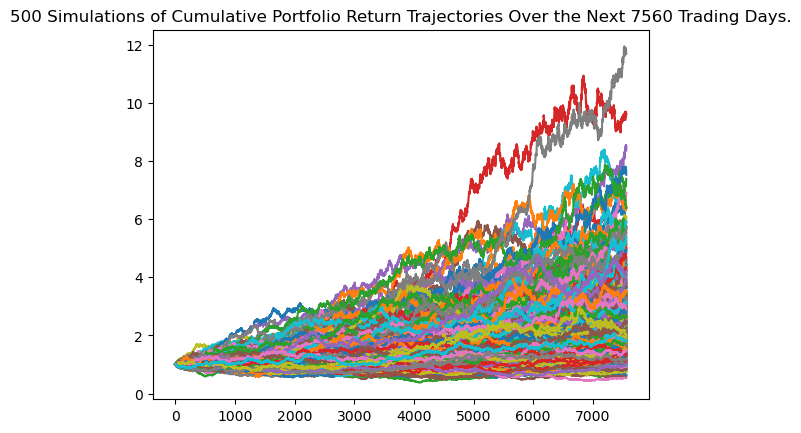

In [35]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

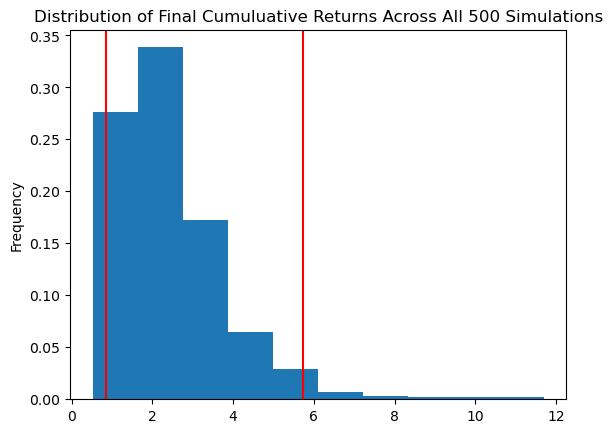

In [36]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.452860
std               1.357436
min               0.526187
25%               1.510169
50%               2.114094
75%               3.083067
max              11.691939
95% CI Lower      0.854875
95% CI Upper      5.728551
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17097.49 and $114571.02


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $25646.24 and $171856.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_5year = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.10,.90],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

MC_5year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-01-24 05:00:00+00:00  108.25  108.32  108.15  108.29  2362470   
2018-01-25 05:00:00+00:00  108.26  108.57  108.19  108.57  9858098   
2018-01-26 05:00:00+00:00  108.51  108.51  108.27  108.37  3808163   
2018-01-29 05:00:00+00:00  108.14  108.25  108.02  108.18  3974898   
2018-01-30 05:00:00+00:00  108.12  108.12  107.92  108.01  3659538   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-24 05:00:00+00:00       10803  108.259722          NaN  284.02   
2018-01-25 05:00:00+00:00       19793  108.434750     0.002586  284.16   
2018-01-26 05:00:00+00:00       13216  108.364405    -0.001842  284.25   
2018-01-29 05:00:00+00:00       17162  108.140754    -0.001753  285.93   
2018-01-30 05:00:00+00:00       14454  108.010293    -0.001571  282.59   

                                                                             \
                               high      low   close     volume trade_count   
timestamp                                                                     
2018-01-24 05:00:00+00:00  284.7000  281.840  283.12  137943542      357700   
2018-01-25 05:00:00+00:00  284.2700  282.405  283.30   85942448      267779   
2018-01-26 05:00:00+00:00  286.6285  283.960  286.56  111502740      267028   
2018-01-29 05:00:00+00:00  286.4300  284.500  284.64   90206637      286719   
2018-01-30 05:00:00+00:00  284.7360  281.220  281.63  132075557      427207   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-24 05:00:00+00:00  283.344564          NaN  
2018-01-25 05:00:00+00:00  283.349445     0.000636  
2018-01-26 05:00:00+00:00  285.508779     0.011507  
2018-01-29 05:00:00+00:00  285.443701    -0.006700  
2018-01-30 05:00:00+00:00  282.425628    -0.010575

In [48]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\17633\Desktop\FinTech Bootcamp\Financial_Planner\Financial_Planning_for_Retirement\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007765,1.001281,0.995623,0.995980,0.999491,0.999915,1.005076,0.974009,1.017000,1.000590,...,0.985056,1.019886,0.991999,0.982534,1.008725,1.010689,0.993520,1.004078,0.989741,0.982063
2,1.015311,0.992094,1.017508,0.988305,1.006612,1.020683,1.001285,0.968697,1.005447,1.013584,...,0.958464,1.036246,0.981020,0.983541,1.010862,0.989426,0.981372,1.014775,0.969882,0.990087
3,1.014794,0.995302,1.006774,0.975565,1.005991,1.021781,1.014630,0.982127,1.000515,1.008939,...,0.950142,1.045709,0.991506,0.967153,0.988889,0.976174,0.949234,1.020675,0.971713,0.980533
4,1.006954,0.999243,1.005609,0.973134,1.006300,1.019821,1.025742,0.986861,0.990449,0.988997,...,0.945796,1.046358,0.978471,0.964314,0.983559,0.974285,0.946014,1.035132,0.963922,0.958058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.747501,1.381118,0.946981,1.118033,1.635662,2.051642,1.512026,1.421039,1.451695,1.542153,...,1.576156,1.812727,0.910379,1.922469,0.899632,0.944305,0.820690,2.525281,1.991552,1.802656
1257,0.748049,1.392091,0.942938,1.115441,1.680515,2.064500,1.511173,1.398073,1.405159,1.559235,...,1.569709,1.790559,0.897164,1.946311,0.888693,0.949961,0.818489,2.537017,1.971345,1.815742
1258,0.753109,1.405956,0.945172,1.105192,1.689181,2.050450,1.528892,1.382371,1.410399,1.569541,...,1.535890,1.839868,0.879763,1.975741,0.902690,0.952745,0.813421,2.573381,1.975865,1.797838
1259,0.753582,1.397629,0.955120,1.112838,1.693892,2.043154,1.506142,1.387968,1.415995,1.569040,...,1.529018,1.835199,0.888314,1.957095,0.920967,0.940440,0.797789,2.618627,1.973087,1.793926


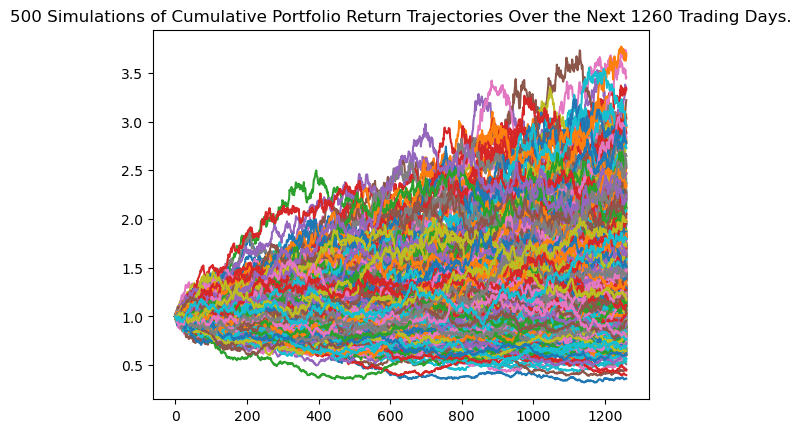

In [49]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

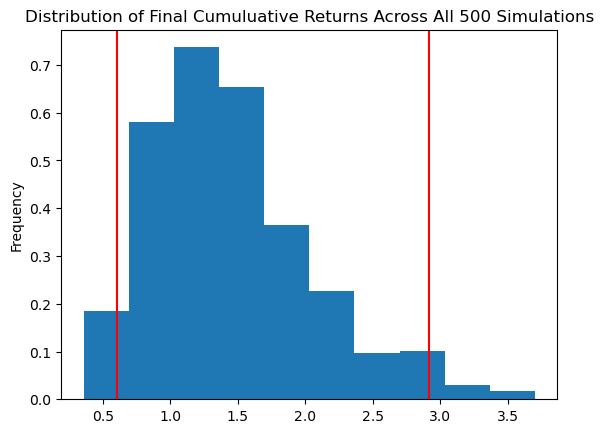

In [50]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.522210
std               0.717555
min               0.399976
25%               1.034787
50%               1.342931
75%               1.830288
max               5.123211
95% CI Lower      0.651979
95% CI Upper      3.581010
Name: 1260, dtype: float64


In [63]:
# Set initial investment
initial_investment_5 = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*initial_investment_5,2)
ci_upper_five = round(tbl_5[9]*initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $32598.94 and $179050.51


### Ten Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_10year = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [87]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\17633\Desktop\FinTech Bootcamp\Financial_Planner\Financial_Planning_for_Retirement\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002420,0.993968,0.986715,0.990080,0.993181,1.000144,0.997629,0.993028,1.007209,1.002282,...,0.990156,1.007955,0.985570,1.008749,1.000974,0.977867,0.994115,0.993064,0.985314,0.987031
2,0.989520,0.988152,0.984281,0.993851,0.995979,0.992606,1.002653,0.996700,1.000741,1.006205,...,0.985805,1.005709,0.994642,1.015826,1.005559,0.976115,1.012611,0.984880,0.982112,0.993660
3,1.000760,1.006126,0.976817,0.995785,1.006354,0.993997,0.987695,1.015522,0.995288,0.989911,...,0.992537,1.005836,0.983449,1.007512,1.013537,0.978450,1.013533,0.987441,0.975207,0.977269
4,0.998156,1.006798,0.962117,1.004950,1.006219,1.022218,0.964210,1.007856,0.988129,1.001652,...,1.006490,0.990982,0.990367,0.992108,1.008885,0.977598,1.034156,0.978781,0.974784,0.953761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.001070,1.019869,2.296800,2.240861,1.445184,3.085558,1.305768,1.579350,2.666719,0.803323,...,3.087477,2.048516,4.723819,2.401959,1.671334,1.681012,0.644954,2.311426,1.765062,1.713800
2517,0.985778,1.018217,2.267580,2.239067,1.460251,3.022809,1.292390,1.570310,2.664727,0.799133,...,3.136588,2.047057,4.756006,2.411332,1.678055,1.681509,0.655569,2.267620,1.779785,1.695894
2518,0.990722,1.013928,2.272082,2.199179,1.475304,2.976501,1.255817,1.558914,2.656869,0.821252,...,3.159017,2.022167,4.756968,2.415021,1.704294,1.672020,0.664405,2.251859,1.780526,1.694429
2519,0.998919,1.018223,2.275281,2.166406,1.489677,3.007396,1.246396,1.567825,2.634931,0.829608,...,3.161934,2.023316,4.735870,2.420676,1.706220,1.688678,0.662321,2.242674,1.779451,1.686438


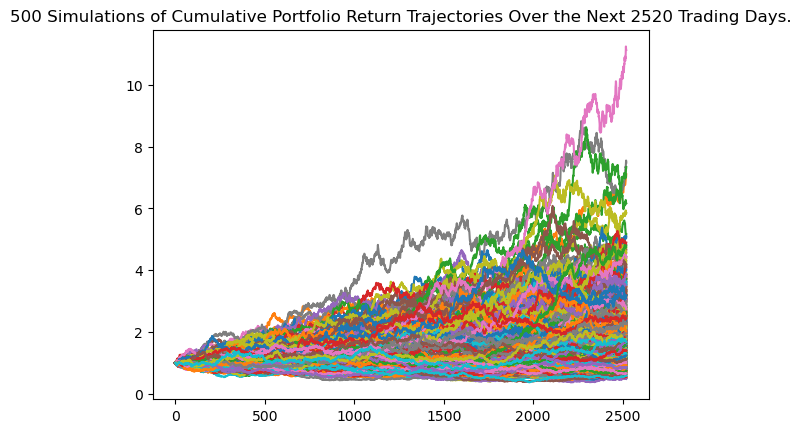

In [88]:
# Plot simulation outcomes
line_plot_10 = MC_10year.plot_simulation()

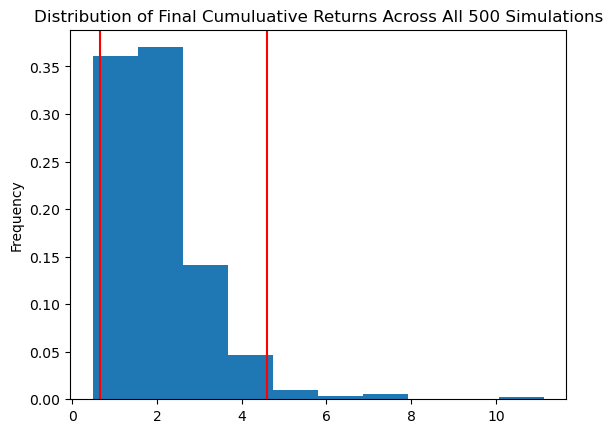

In [89]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10year.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

count           500.000000
mean              2.022300
std               1.131136
min               0.483571
25%               1.244811
50%               1.802218
75%               2.503617
max              11.128902
95% CI Lower      0.651779
95% CI Upper      4.606634
Name: 2520, dtype: float64


In [94]:
# Set initial investment
initial_investment_10 = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*initial_investment_10,2)
ci_upper_ten = round(tbl_10[9]*initial_investment_10,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}. Based on the two scenarios I ran, it would be my recommendation"
      f" to go heavy into stocks at a 80%-90% rate and maximize your initial ivestment if you would like to retire in 5 to"
      f" 10 years.")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $26071.17 and $184265.36. Based on the two scenarios I ran, it would be my recommendation to go heavy into stocks at a 80%-90% rate and maximize your initial ivestment if you would like to retire in 5 to 10 years.
